In [ ]:
## script to crete a line plot for MOI reduction experiment, from 10 to 0.01

In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import re

In [2]:
# mutation color dict
def COLORS():
    colors = {'T1764.0-': '#F50202',
             'A1664.0G': '#fca003',
             'A535.0G': '#5EC0D2',
             'T1440.0C': '#F1F87A',
             'T1440.0G': '#bfbb71',
             'A1443.0G': '#731f1f',
             'A1611.0G': '#6988b8',
             'C1724.0T': '#8FD95A',
             'A1744.0G': '#FBB3DD',
             'G1906.0A': '#A3A3A3',
             'C3358.0T': '#26451C',
             'G3114.0A': '#B37A42',
             'A1770.0G': '#b3b2ad',
             'G2310.0A': '#033E86',
             'A2626.0G': '#8FD95A',
             'C3299.0T': '#211785',
             'C1718.0T': '#4e0d8c',
             'T862.0C': '#880E05',
             'A2790.0T': '#DF36C6',
             'G1736.0A': '#CFFD2F',
             'C1549.0T': '#cd99f2',
             'G531.0A': '#DFC236',
             'C1050.0T': '#0D2291',
             'G1688.0T': '#13B908',
             'A2356.0G': '#2d16f7',
             'T170.0A': '#C60DC3',
             'A1673.0G': '#E2D492',
             'C2859.0T': '#972FFE',
             'T21.0C': 'grey',
             'T323.0A': 'black',
             'G2317.0A': '#E4CEFD',
             'C3378.0T': '#828282',
             'C1735.0T': '#AFF31E',
             'G1560.0A': '#646669',
             'T1829.0C': '#147040',
             'A2731.0G': '#B0F7FF',
             'G710.0A': "#ad8f61", 
             'C1056.0T': "#bd099f", 
             'A784.0G': "#875408", 
             'A1520.0G': "#92bf91",
             'A1829.0G': "#6e465a"}
    return colors

In [3]:
# this function will return a list of colors for all the mutations that are not in the color dict
def generate_colors(i):
    
    cmap_a = matplotlib.colormaps['Pastel1']
    cmap_b = matplotlib.colormaps['Dark2']  
    cmap_c = matplotlib.colormaps['tab20b'] 
    cmap_d = matplotlib.colormaps['Set3'] 
    
    if i < cmap_a.N:
        color = cmap_a(i % cmap_a.N)
    elif i < (cmap_a.N + cmap_b.N):
        color = cmap_b((i - cmap_a.N) % cmap_b.N)
    elif i < (cmap_a.N + cmap_b.N + cmap_c.N):
        color = cmap_c((i - cmap_a.N - cmap_b.N) % cmap_c.N)
    else:
        color = cmap_d((i - cmap_a.N - cmap_b.N - cmap_c.N) % cmap_d.N)    
        
    return color

In [4]:
# create line plot
def plot_freqs(freqs_dfs, output_path, mutations, cutoff):
    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 9), facecolor="white")
    # determine mutation order for the plot legend
    legend_order = ["A1744.0G", "T1829.0C", "G1688.0T", "C1735.0T", "A1664.0G", "C1718.0T", 
                    "C2859.0T", "C1549.0T", "A535.0G"]
    exp_lib = {"Carmel_A": "A", "Carmel_B": "B", "Shir_A": "C", "Shir_B": "D", "Shir_C": "E", 
               "Maria_A": "F", "Maria_B": "G", "Maria_C": "H"} # rename lines
    # create legend for plots, assign random colors to muts not in the color dictionary
    color_legend = {key: COLORS()[key] for key in mutations if key in COLORS()}
    i = 0
    for mut in mutations:
        if mut not in color_legend:
            print("Mutation {} not in color dictionary, random color was assigned.".format(mut))
            color_legend[mut] = generate_colors(i)
            i = i + 1
    
    ax = ax.flatten()
    j=0
    for sample_data in freqs_dfs:
        sample = sample_data[1]
        freqs = sample_data[0]
        freqs = freqs.loc[freqs.index.isin(mutations)]
        passages = freqs.columns.drop_duplicates().to_list()
        sample_muts = freqs.index.drop_duplicates().to_list()
        for mutation in sample_muts:
            ax[j].plot(passages, freqs.loc[mutation], label=mutation, marker=".", color=color_legend[mutation])
        
        ax[j].set_yticks(np.arange(0, 1.1, 0.2))
        if j == 0: 
            ax[j].set_ylabel('Mutation Frequency', fontsize=20, labelpad=5)
        ax[j].set_xlabel('Time (Min)', fontsize=20, labelpad=5)
        ax[j].set_title("Line {}".format(exp_lib[sample]), fontsize=20)
        ax[j].set_xticks([0, 5, 10, 15])
        ax[j].tick_params(axis='y', labelsize=17)
        ax[j].tick_params(axis='x', labelsize=17)
        ax[j].grid(color='#e1e4e8')
        ax[j].axvspan(0, 10, color='white')
        ax[j].axvspan(10, 15, color='#9E9E9F', alpha=0.1)
        ax[j].set_xlim([0, 15])
        j = j + 1

    plt.suptitle("MOI 10 to 0.01".format(int(cutoff*100)), fontsize=20, fontweight="bold")
    filename = "moi10_to_001_line_plot_moran_{}_filtered.png".format(cutoff)
    output_name = os.path.join(output_path, filename)
    plt.subplots_adjust(right=0.8, wspace=0.2, top=0.85, bottom=0.6)
    ordered_colors = {}
    # for legend specific order
    for key in legend_order:
        if key in color_legend:
            new_key = key.replace(".0", "").replace("T", "U")
            ordered_colors[new_key] = color_legend[key]
    for key in color_legend:
        if key not in legend_order:
            new_key = key.replace(".0", "").replace("T", "U")
            ordered_colors[new_key] = color_legend[key]
    color_legend = ordered_colors
    legend_patches = [mpatches.Patch(color=col, label=lab) for lab, col in color_legend.items()]
    plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1.07), fontsize=18)
    plt.savefig(output_name)
    plt.show()

In [5]:
# function that creates a merged df for samples from original passaging (pyAccuNGS pipeline)
def get_freqs_pyAccuNGS(input_path):
    freqs_ls = []
    # get frequency (freqs) files for each sample
    for root, dirs, files in os.walk(input_path):    
        if "freqs.tsv" in files:
            folder_name = root.split("/")[-1]
            freq_path = os.path.join(root, "freqs.tsv")
            freqs = pd.read_csv(freq_path, sep="\t")
            folder_segments = folder_name.split("_")[0].split("-")
            passage = int(re.findall(r"\d+", folder_segments[0])[0])
            # remove passage 10 from original passaging exp (was resequenced) + remove unrelated passages
            if (passage != 10) and (passage != 15):
                # get sample data from file name (passage, line)
                freqs["passage"] = passage
                line = folder_segments[1]
                freqs["line"] = line
                freqs["mut_name"] = freqs.apply(lambda row: "".join([row["ref_base"], str(row["ref_pos"]), row["read_base"]]), axis=1)
                freqs_ls.append(freqs)

    # merge all freqs files
    all_freqs = pd.concat(freqs_ls).reset_index(drop=True)
    return all_freqs

# function that creates a merged df for sampels after MOI reduction (pyAccuNGS pipeline)
def get_collapse_freqs(input_path, experiment):
    freqs_ls = []
    # get frequency (freqs) files for each sample
    for root, dirs, files in os.walk(input_path):    
        folder_name = root.split("/")[-1]
        if ("freqs.tsv" in files) and (experiment in folder_name):
            freq_path = os.path.join(root, "freqs.tsv")
            freqs = pd.read_csv(freq_path, sep="\t")
            folder_segments = folder_name.split("_")
            # get sample data from file name (passage, line)
            passage = int(re.findall(r"\d+", folder_segments[0])[0])
            freqs["passage"] = passage
            line = folder_segments[0][-1]
            freqs["line"] = line
            freqs["mut_name"] = freqs.apply(lambda row: "".join([row["ref_base"], str(row["ref_pos"]), row["read_base"]]), axis=1)
            freqs_ls.append(freqs)

    # merge all freqs files
    all_freqs = pd.concat(freqs_ls).reset_index(drop=True)
    return all_freqs

In [6]:
# create df after frequency filtration
def exp_df(all_freqs, sample, cutoff):
    all_freqs = all_freqs.loc[all_freqs["sample"] == sample, :]
    mut_freqs = all_freqs.loc[(all_freqs["read_base"] != all_freqs["ref_base"]) & (all_freqs["ref_pos"] > 25) & 
                              (all_freqs["ref_pos"] < 3544) & (all_freqs["frequency"] >= cutoff) & 
                              (all_freqs["coverage"] >= 100) & (all_freqs["ref_pos"] != 3539)].reset_index(drop=True) 
    # create list for mutations that are above cutoff at least once
    mutation_list = mut_freqs["mut_name"].drop_duplicates().to_list()
    sample_freqs = all_freqs.loc[all_freqs["mut_name"].isin(mutation_list), :]    
    # keep only relevant colums (for plot)
    sample_freqs = sample_freqs.loc[: , ["mut_name", "passage", "frequency"]].sort_values(["mut_name", "passage"])
    # fills 0 for missing values    
    passage_df = sample_freqs.set_index(['mut_name', 'passage']).unstack(fill_value=0).stack().reset_index()
    # pivot df so each mut is a row and colums are timepoints
    df_pivot = passage_df.pivot(index='mut_name', columns='passage', values='frequency').fillna(0)
    return df_pivot

In [7]:
if __name__ == "__main__":
    input_paths = ["/sternadi/nobackup/volume1/arielle/moi_10/seq_data/shir/",
                  "/sternadi/nobackup/volume1/arielle/moi_10/seq_data/carmel/", 
                  "/sternadi/nobackup/volume1/arielle/moi_10/seq_data/maria/"] # original MOI10 passaging experiment
    collapse_path = "/sternadi/nobackup/volume1/arielle/pyAccuNGS_after_adapterRemoval_and_trim/moi_10_to_001_moran" # after MOI reduction to 0.01
    output_path = "/sternadi/home/volume3/arielle_k/for_adi/paper_2024"
    experiments = ["shir", "carmel", "maria"] # experiment names
    keep = ["Carmel_A", "Shir_C", "Maria_B", "Maria_C"] # keep only relevant lines for MOI reduction
    cutoff = 0.1 # frequency cutoff value
    
    all_freqs_ls = []
    for path, exp in zip(input_paths, experiments):
        freqs = get_freqs_pyAccuNGS(path)
        col_freqs = get_collapse_freqs(collapse_path, exp)
        exp_freqs = pd.concat([freqs, col_freqs]).reset_index(drop=True)
        exp_freqs["experiment"] = exp.capitalize()
        all_freqs_ls.append(exp_freqs)
    all_freqs = pd.concat(all_freqs_ls).reset_index(drop=True)
    all_freqs["sample"] = all_freqs["experiment"] + "_" + all_freqs["line"]
    
    plot_dfs = []
    fil_dfs = []
    for sample in keep:
        sample_df = exp_df(all_freqs, sample, cutoff)
        plot_dfs.append((sample_df, sample))
        fil_dfs.append(sample_df)
        
    # filter out mutationss that appear in only one experiment
    concatenated = pd.concat(fil_dfs, keys=range(len(fil_dfs)), names=['df', 'mut_name'])
    mut_counts = concatenated.index.get_level_values('mut_name').value_counts()
    muts_to_keep = mut_counts[mut_counts > 1].index

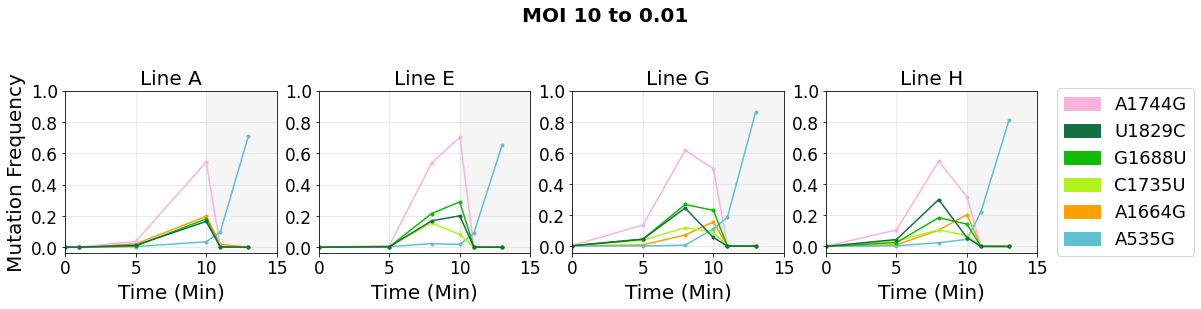

In [8]:
    # create line plot
    plot_freqs(plot_dfs, output_path, muts_to_keep, cutoff)